In [8]:
import numpy as np
from IPython.display import Image,display
import matplotlib.pyplot as plt

In [9]:
import numpy as np  
# import dill
import matplotlib.pyplot as plt  
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log
import math
import sys
from scipy.linalg import svd

# # Read dataset to pandas dataframe
# dataset = pd.read_csv('/home/aishwarya/CSIS/SMAI/SMAI_assig/a-5/codes/data.csv')
# dataset=dataset.iloc[:,1:]



loc='/home/aishwarya/CSIS/SMAI/SMAI_assig/asig_2/RobotDataset/Robot1'
dataset = pd.read_csv(loc,sep=' ') 
dataset.columns= ['Nan','target', 'c2', 'c3', 'c4','c5','c6','c7','id']

dataset = dataset.drop('id', 1)
dataset=dataset.dropna(axis=1)

#moving target to end
dataset=dataset[['c2', 'c3', 'c4','c5','c6','c7','target']]


train, validate = np.split(dataset, [int(.8*len(dataset))]) #for sequential data
# train, validate = np.split(dataset.sample(frac=1), [int(.8*len(dataset))]) # for random 

# train

In [10]:
def prepare_data_X_Y(data1):
    X= data1.iloc[:,:-1].values
    Y= data1.iloc[:,-1].values
    return X,Y
    
x_train,Y_train=prepare_data_X_Y(train)
x_validate,y_validate=prepare_data_X_Y(validate)

# X=dataset1
# X=(X - dataset.mean().values)/dataset.std().values
# type(X)
# X
# x_train
#Xor data
XORdata=np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])
# X=XORdata[:,0:2]
# y=XORdata[:,-1]

X=x_train
y=Y_train
# len(X[0])
# x_validate[3]
ys=[3,5,3,2,3]
print len(np.unique(ys))

3


In [11]:
def print_network(net):
    for i,layer in enumerate(net,1):
        print("Layer {} ".format(i))
        for j,neuron in enumerate(layer,1):
            print("neuron {} :".format(j),neuron)

In [12]:
def initialize_network(input_neurons,hidden_neurons,output_neurons,n_hidden_layers):
    weight_netwrk=[]       
    for i in range(n_hidden_layers):
        if i!=0:
            l=len(weight_netwrk[-1])
            input_neurons=l
            
        hidden_layer = [ { 'weights': np.random.uniform(size=input_neurons)} for i in range(hidden_neurons) ]
        weight_netwrk.append(hidden_layer)
    
    output_layer = [ { 'weights': np.random.uniform(size=hidden_neurons)} for i in range(output_neurons)]
    weight_netwrk.append(output_layer)
    
    return weight_netwrk

In [13]:
def activate_sigmoid(sum):
    return (1/(1+np.exp(-sum)))

def activate_tanh(x):
    return np.tanh(x)

def activate_ReLU(x):
    return x * (x > 0)

def d_tanh(x):
    return 1. - x * x

def d_ReLU(x):
    return 1. * (x > 0)

In [14]:
input_neurons=len(X[0])
hidden_neurons=input_neurons+1
output_neurons=len(np.unique(y))

n_hidden_layers=int(raw_input("enter number of hidden layers: "))
# act_func="sigmoid"
act_func=raw_input("enter activation function: ")
# loss_func="MSE"
loss_func=raw_input("enter loss function: ")
net=initialize_network(input_neurons,hidden_neurons,output_neurons,n_hidden_layers)

# print_network(net)

enter number of hidden layers: 1
enter activation function: sigmoid
enter loss function: MSE


In [15]:
# cross validation error
def negative_log_likelihood(self):
    sigmoid_activation = softmax(numpy.dot(self.x, self.W) + self.b)
    cross_entropy = - numpy.mean(numpy.sum(self.y * numpy.log(sigmoid_activation) +(1 - self.y) * numpy.log(1 - sigmoid_activation), axis=1))
    return cross_entropy

In [16]:
def forward_propagation(wgt_net,inputs,act_func):
    cur_row=inputs
    for layer in wgt_net:
#     i=0
#     while i<len(net):
#         print 'layr-'
#         print net[i]
#         layer=net[i]
        prev_input=np.array([])
        for neuron in layer:
            sum=neuron['weights'].T.dot(cur_row)
            
            if act_func=="sigmoid":
                result=activate_sigmoid(sum)
            elif act_func=="relu":
                result=activate_ReLU(sum)
            elif act_func=="tanh":
                result=activate_tanh(sum)
                
            neuron['result']=result
            
            prev_input=np.append(prev_input,[result])
            
        cur_row =prev_input
#         i+=1
    
    return cur_row

In [17]:
def d_sigmoid(output):
    return output*(1.0-output)

# expand
def cross_entropy(predictions, targets, epsilon=1e-12):
    """
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions+1e-9))/N
    return ce


In [18]:
def back_propagation(wgt_net,row,expected,act_func):
    length=len(wgt_net)
    for i in reversed(range(length)):
        layer=wgt_net[i]
        layr_len=len(layer)
        errors=np.array([])
        if i==length-1:
            results=[neuron['result'] for neuron in layer]
            res=np.array(results) 
            errors = expected-res
        else:
            for j in range(layr_len):
                herror=0
                nextlayer=wgt_net[i+1]
                for neuron in nextlayer:
                    herror= herror+(neuron['weights'][j]*neuron['delta'])
                    
                errors=np.append(errors,[herror])
        j=0
        while j<layr_len:            
            neuron=layer[j]
            if act_func=="sigmoid":
                neuron['delta']=errors[j]*d_sigmoid(neuron['result'])
            elif act_func=="relu":
                neuron['delta']=errors[j]*d_ReLU(neuron['result'])
            elif act_func=="tanh":
                neuron['delta']=errors[j]*d_tanh(neuron['result'])
            j+=1


In [19]:
def updateWeights(net,input_layr,lrate):
    i=0
    while i<len(net):
#     for i in range(len(net)):
        inputs = input_layr
        if i!=0:
            inputs=[neuron['result'] for neuron in net[i-1]]

        for neuron in net[i]:
            j=0
            while j<len(inputs):
                neuron['weights'][j]+=lrate*neuron['delta']*inputs[j]
                j+=1
        i+=1

In [20]:
def evaluate(net,row,act_func):
    ans=forward_propagation(net,row,act_func)
    return ans

def new_weight(net,lrate,row):
    updateWeights(net,row,lrate)  


def back_prop(net,row,expected,act_func):
    back_propagation(net,row,expected,act_func)
    
def training(net, epochs,lrate,n_outputs,act_func,loss_func):
    errors_list=list()
    epoc_list=[]
    for epoch in range(epochs):
        sum_error=0
        for i,row in enumerate(X):
            
            expected=[0.0 for i in range(n_outputs)]
            expected[y[i]]=1
            
            outputs=evaluate(net,row,act_func)
            
            if loss_func=="MSE":
                sum_error+=sum([(expected[j]-outputs[j])**2 for j in range(len(expected))])
            else:
                sum_error=cross_entropy(outputs,expected)
                
            back_prop(net,row,expected,act_func)
            new_weight(net,lrate,row)
#             back_propagation(net,row,expected)
#             updateWeights(net,row,lrate)

        if epoch%100 ==0:
            print('>epoch=%d,error=%.3f'%(epoch,sum_error))
            epoc_list.append(epoch)
            errors_list.append(sum_error)
    return errors_list,epoc_list

In [21]:

errors_list,epoc_list=training(net,1000, 0.05,output_neurons,act_func,loss_func)

>epoch=0,error=88.531
>epoch=100,error=0.026
>epoch=200,error=0.014
>epoch=300,error=0.009
>epoch=400,error=0.007
>epoch=500,error=0.006
>epoch=600,error=0.005
>epoch=700,error=0.004
>epoch=800,error=0.004
>epoch=900,error=0.003


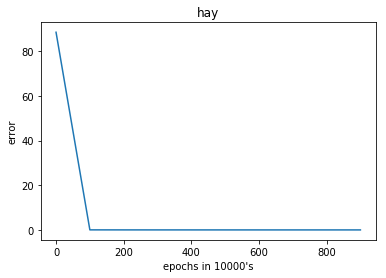

In [22]:
plt.plot(epoc_list,errors_list)
plt.ylabel('error')
plt.xlabel("epochs in 10000's")
plt.title('hay')
fname="NN_errors_wrt_"+act_func+"_"+loss_func+"_.png"
plt.savefig(fname)
plt.show()

In [23]:
# validate

In [24]:
# Make a prediction with a network
def predict(network, row,act_func):
    outputs = forward_propagation(net, row,act_func)
    return outputs

In [25]:
pred_y=[]
for i in range(len(validate)):    
    pred=predict(net,x_validate[i],act_func)
    output=np.argmax(pred)
    print 'pred-',pred
    pred_y.append(output)
        
cor=0
for i in range(len(validate)):
    if y_validate[i]==pred_y[i]:
        cor+=1

accuracy=cor*100/len(validate)
# print 'pred_y=',pred_y
print 'accuracy=', accuracy

pred- [ 0.00388196  0.99615894]
pred- [ 0.00374057  0.99635405]
pred- [ 0.00389736  0.9961599 ]
pred- [ 0.00384806  0.99622139]
pred- [ 0.00375096  0.99634455]
pred- [ 0.00383444  0.99621226]
pred- [ 0.00377488  0.9963044 ]
pred- [ 0.00373253  0.99636075]
pred- [ 0.0038514   0.99618898]
pred- [ 0.00378415  0.99629355]
pred- [ 0.00372699  0.99636723]
pred- [ 0.00373251  0.99635805]
pred- [ 0.00372279  0.99637074]
pred- [ 0.00378018  0.99627213]
pred- [ 0.00375892  0.99631558]
pred- [ 0.00374403  0.99633605]
pred- [ 0.00371964  0.99637346]
pred- [ 0.00379937  0.9962633 ]
pred- [ 0.00372712  0.9963661 ]
pred- [ 0.00372541  0.99636868]
pred- [ 0.00371928  0.99637534]
pred- [ 0.0037533   0.99631616]
pred- [ 0.00373023  0.99635591]
pred- [ 0.00371966  0.99637231]
pred- [ 0.00371449  0.99637942]
accuracy= 84


In [29]:
ansTest = pd.DataFrame(pred_y)
ansTest.to_csv('2018202005_prediction.csv', index=False)

# from google.colab import files
# files.download("2018202015_prediction.csv")